In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
# Load the Iris dataset
iris = load_iris()

In [3]:
# Extract feature data
X = iris.data  # or iris['data']
feature_names = iris.feature_names
target = iris.target

In [4]:
# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)

In [5]:
df['species'] = iris.target_names[target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
from sklearn.cluster import AgglomerativeClustering

# Define the model
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [11]:

# Fit the model
labels = agg_cluster.fit_predict(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [12]:
# Add cluster labels to the DataFrame
df['cluster'] = labels

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix
conf_matrix = confusion_matrix(target, labels)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 0 50  0]
 [49  0  1]
 [15  0 35]]


In [14]:
# Accuracy Score (Note: In clustering, accuracy isn't always meaningful)
accuracy = accuracy_score(target, labels)
print("\nAccuracy Score:", accuracy)


Accuracy Score: 0.23333333333333334


In [15]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [16]:
# Compute the linkage matrix
linked = sch.linkage(X, method='ward')

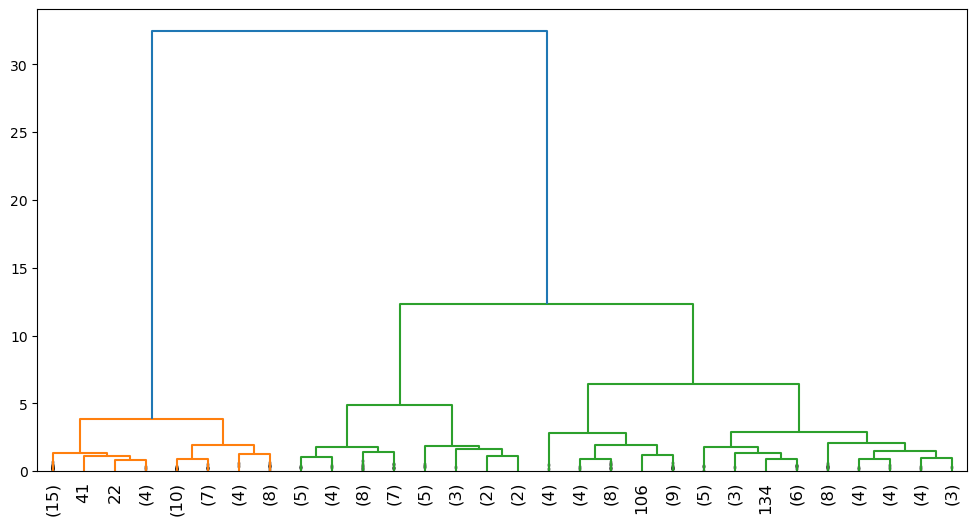

In [17]:
# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linked,
                            truncate_mode='lastp',  # show only the last p merged clusters
                            p=30,  # show only the last 30 merged clusters
                            leaf_rotation=90.,
                            leaf_font_size=12.,
                            show_contracted=True)

Text(0.5, 1.0, 'Dendrogram for Agglomerative Clustering')

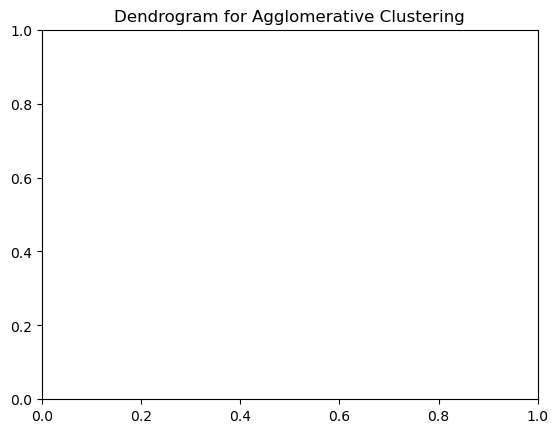

In [18]:
plt.title('Dendrogram for Agglomerative Clustering')

Text(0.5, 0, 'Sample Index or Cluster Size')

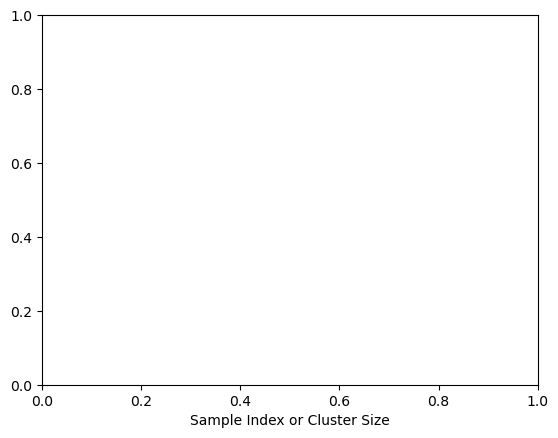

In [19]:
plt.xlabel('Sample Index or Cluster Size')

Text(0, 0.5, 'Distance')

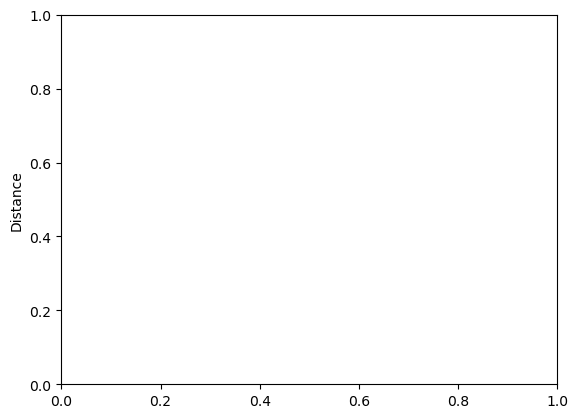

In [20]:
plt.ylabel('Distance')

In [21]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [22]:
plt.show()